<a href="https://colab.research.google.com/github/Abhinair26/Razor-pay-Fraud-Detection/blob/main/Razor_pay_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("creditcard.csv")
print(df.info())
print(df.head())
print(df['Class'].value_counts())  # 0 = legitimate, 1 = fraud


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67434 entries, 0 to 67433
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    67434 non-null  int64  
 1   V1      67434 non-null  float64
 2   V2      67434 non-null  float64
 3   V3      67434 non-null  float64
 4   V4      67434 non-null  float64
 5   V5      67434 non-null  float64
 6   V6      67434 non-null  float64
 7   V7      67434 non-null  float64
 8   V8      67434 non-null  float64
 9   V9      67434 non-null  float64
 10  V10     67434 non-null  float64
 11  V11     67434 non-null  float64
 12  V12     67434 non-null  float64
 13  V13     67434 non-null  float64
 14  V14     67434 non-null  float64
 15  V15     67434 non-null  float64
 16  V16     67434 non-null  float64
 17  V17     67434 non-null  float64
 18  V18     67434 non-null  float64
 19  V19     67434 non-null  float64
 20  V20     67434 non-null  float64
 21  V21     67433 non-null  float64
 22

In [3]:
# Check for missing values
print(df.isnull().sum())

# Normalize the 'Amount' feature
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Time', 'Amount'], axis=1)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [5]:
# Check class distribution
from collections import Counter
print(Counter(df['Class']))

# Drop rows with missing values in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

# Undersample the majority class for testing or use SMOTE for synthetic oversampling
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('Class', axis=1)
y = df['Class']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

Counter({0.0: 67264, 1.0: 169, nan: 1})


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[37  1]
 [ 3 27]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        38
         1.0       0.96      0.90      0.93        30

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68



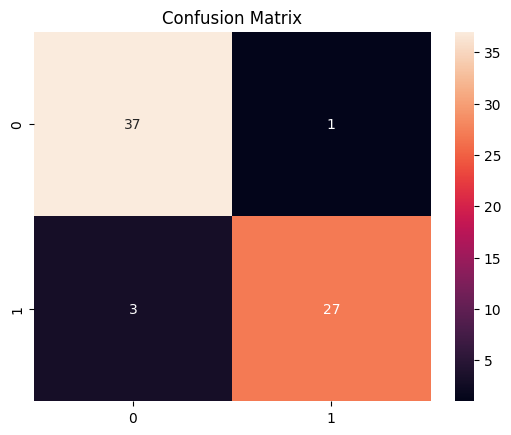

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
